In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [2]:
concrete_data = pd.read_csv('concrete.csv', encoding='UTF-8')
concrete_data.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
913,318.8,212.5,0.0,155.7,14.3,852.1,880.4,56,66.10
181,359.0,19.0,141.0,154.0,10.9,942.0,801.0,28,59.49
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
769,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,28,39.05
956,356.0,119.0,0.0,160.0,9.0,1061.0,657.0,28,59.00
841,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,3,28.80
332,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
613,238.1,0.0,94.1,186.7,7.0,949.9,847.0,28,30.23
722,249.1,0.0,98.8,158.1,12.8,987.8,889.0,28,30.85
171,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,56,48.59


In [3]:
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
concrete_data_corr_pearson = concrete_data.corr(method='pearson')
concrete_data_corr_pearson

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [9]:
concrete_data_corr_spearman = concrete_data.corr(method='spearman')
concrete_data_corr_spearman

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640,0.477614
slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581,0.164105
ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801,-0.077830
water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942,-0.308414
superplastic,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525,0.347786
coarseagg,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928,-0.183542
fineagg,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362,-0.179962
age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000,0.596028
strength,0.477614,0.164105,-0.077830,-0.308414,0.347786,-0.183542,-0.179962,0.596028,1.000000


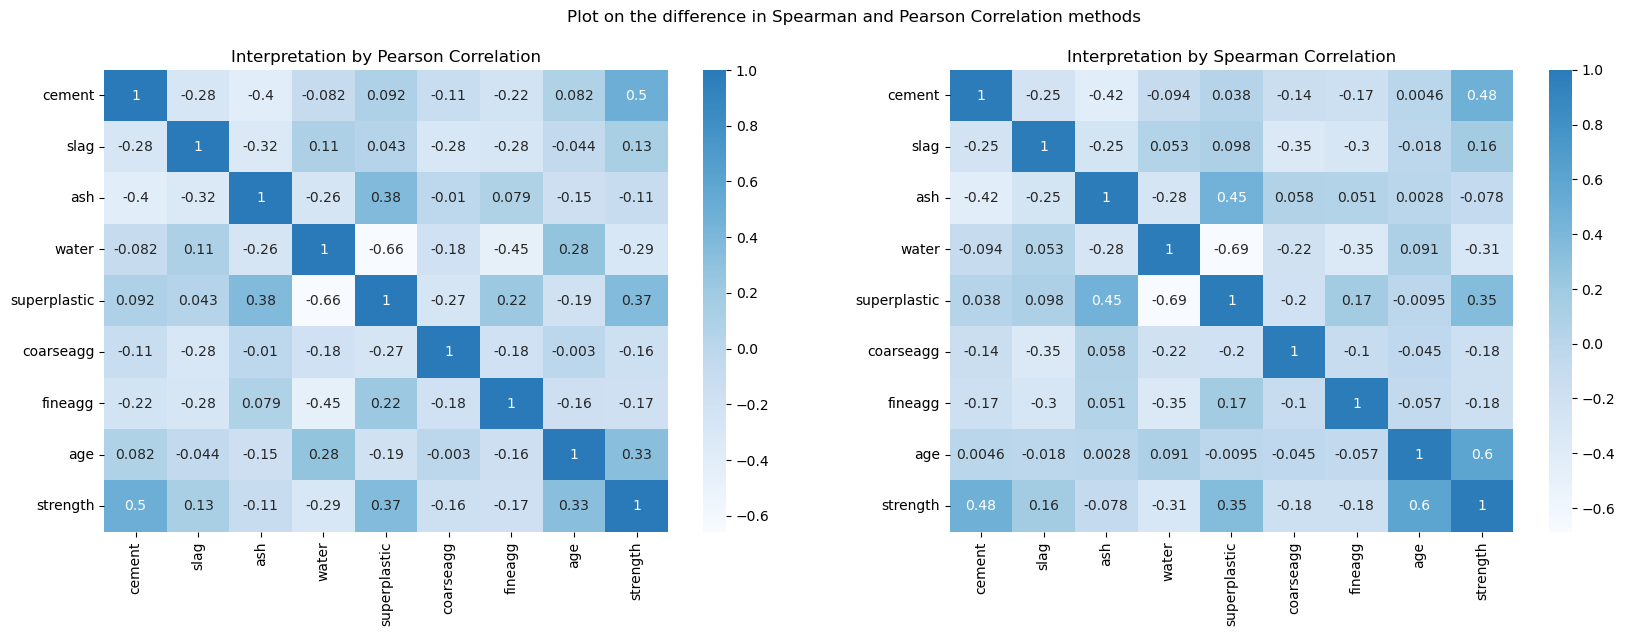

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.heatmap(concrete_data_corr_pearson, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Pearson Correlation')
plt.subplot(1, 2, 2)
sns.heatmap(concrete_data_corr_spearman, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Spearman Correlation')
plt.suptitle('Plot on the difference in Spearman and Pearson Correlation methods')
plt.show()

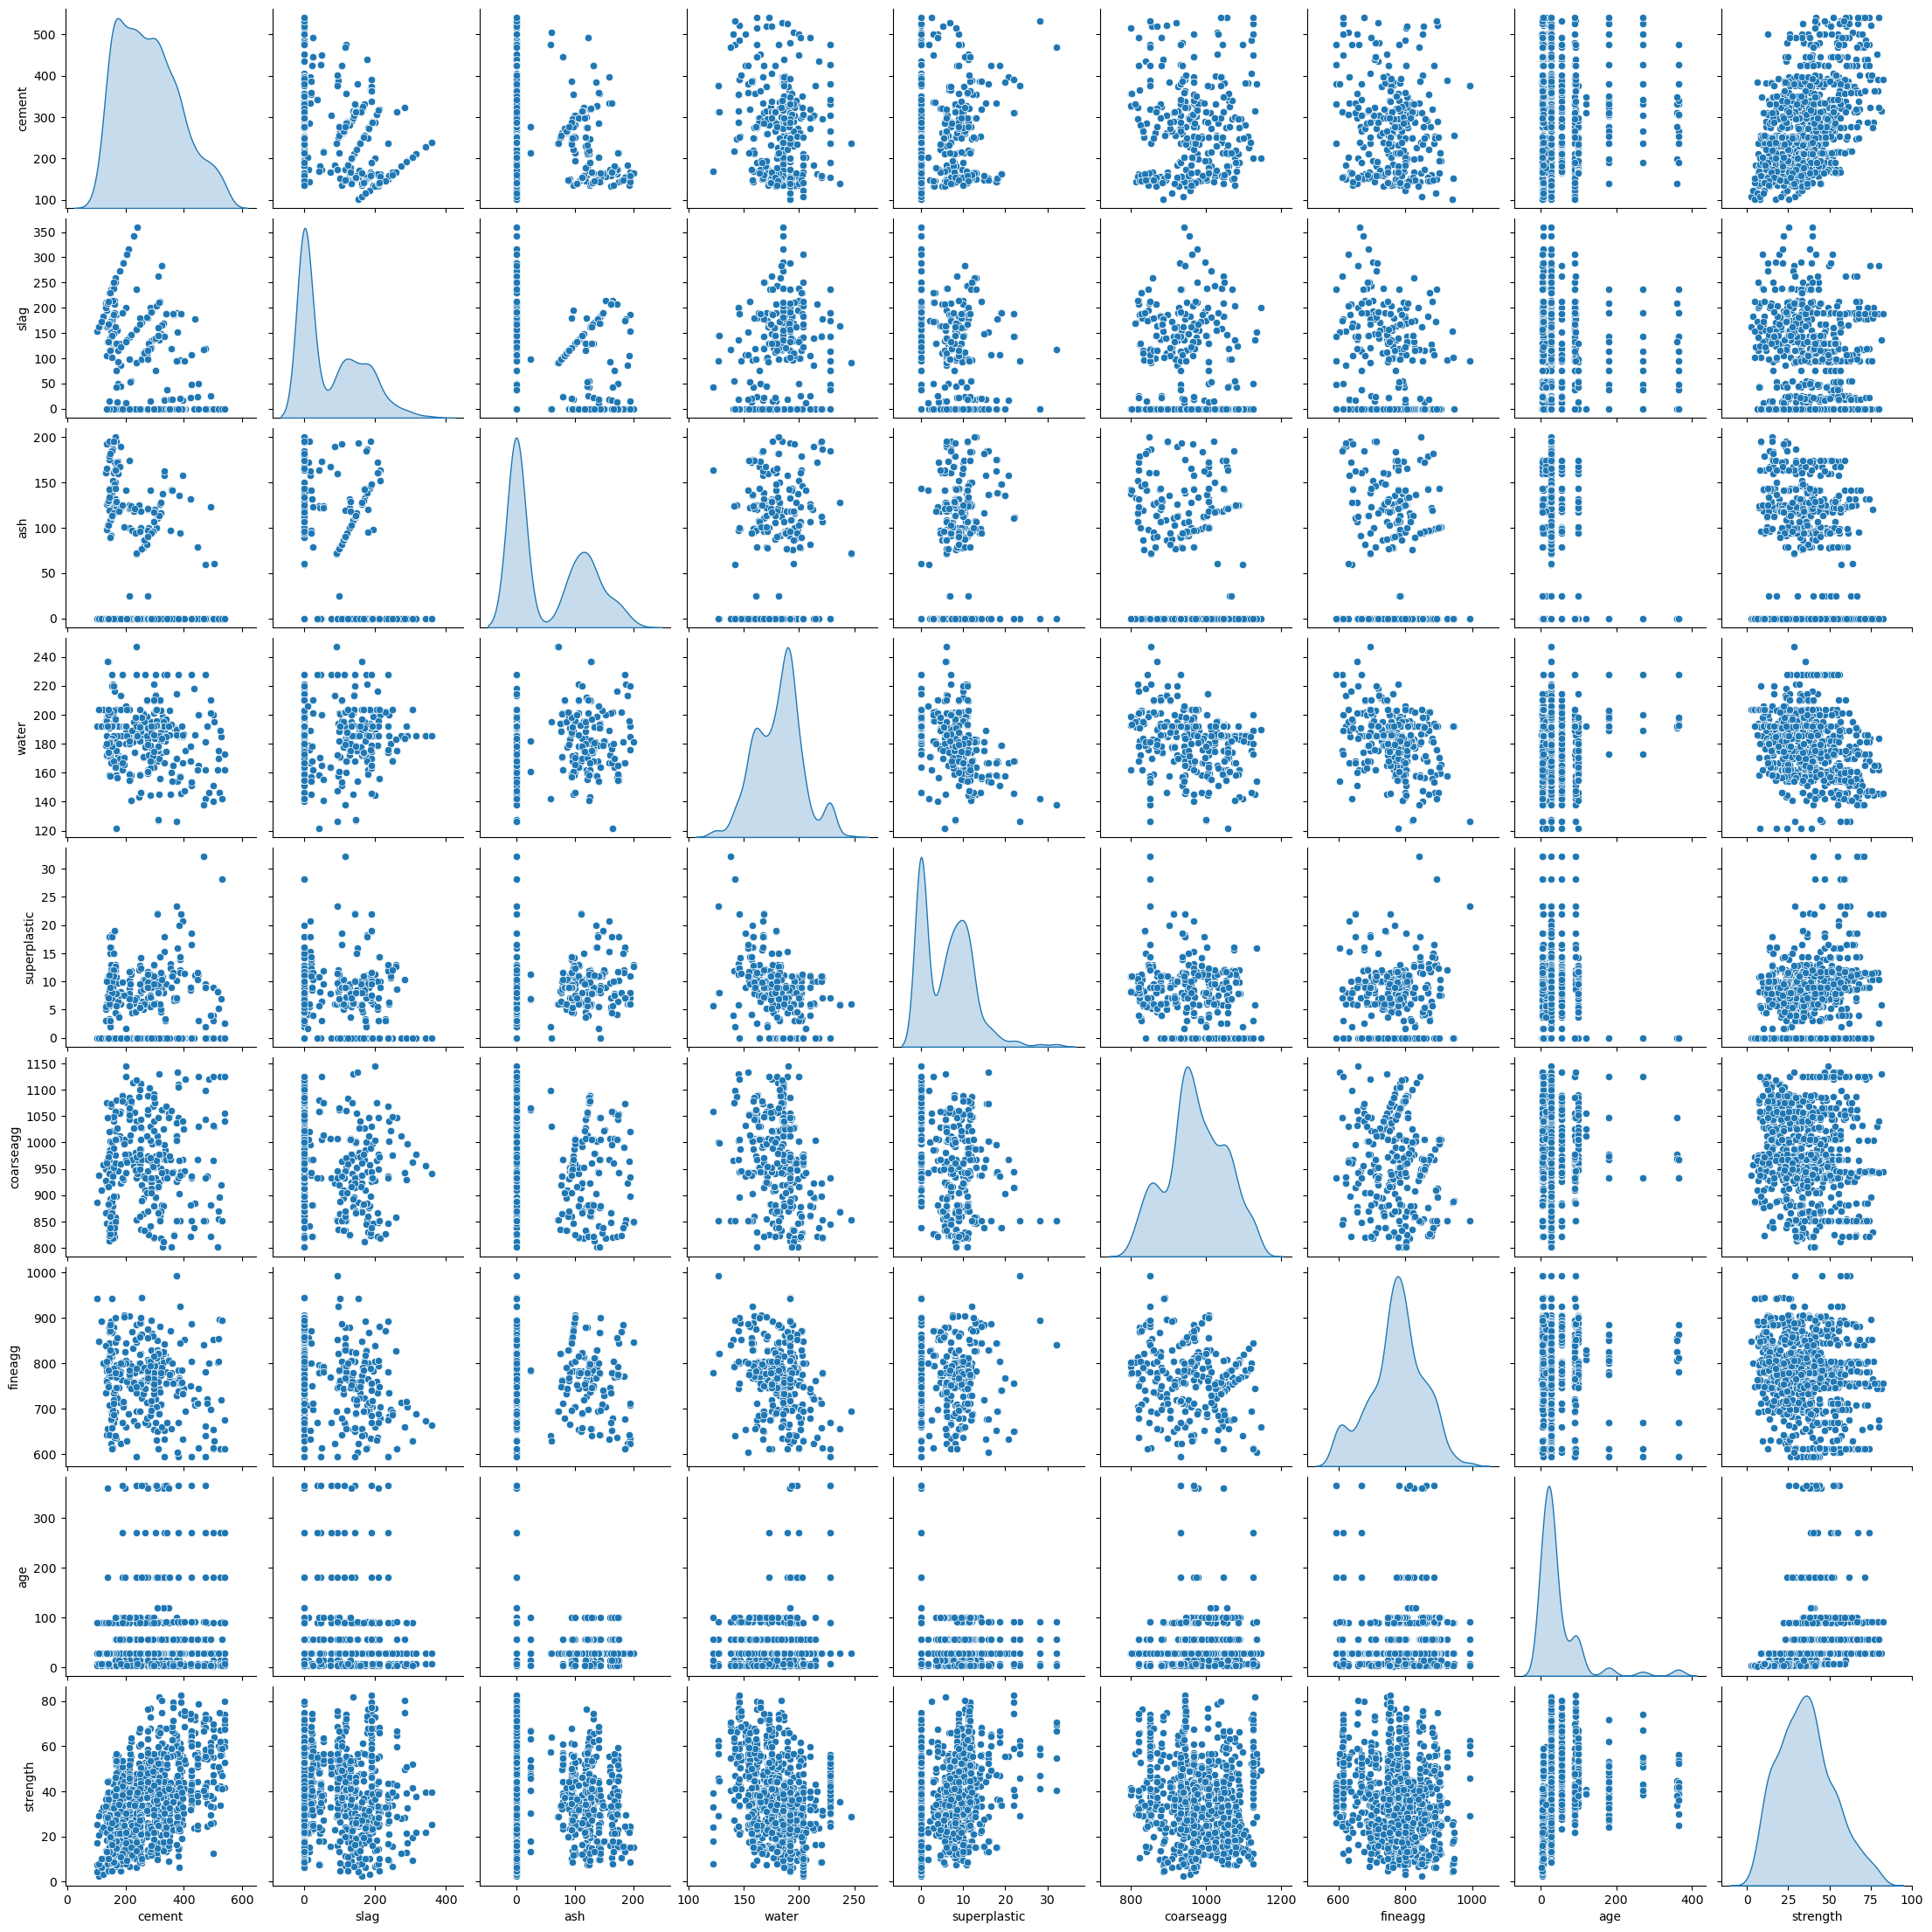

In [11]:
sns.pairplot(data=concrete_data, diag_kind='kde')
plt.show()

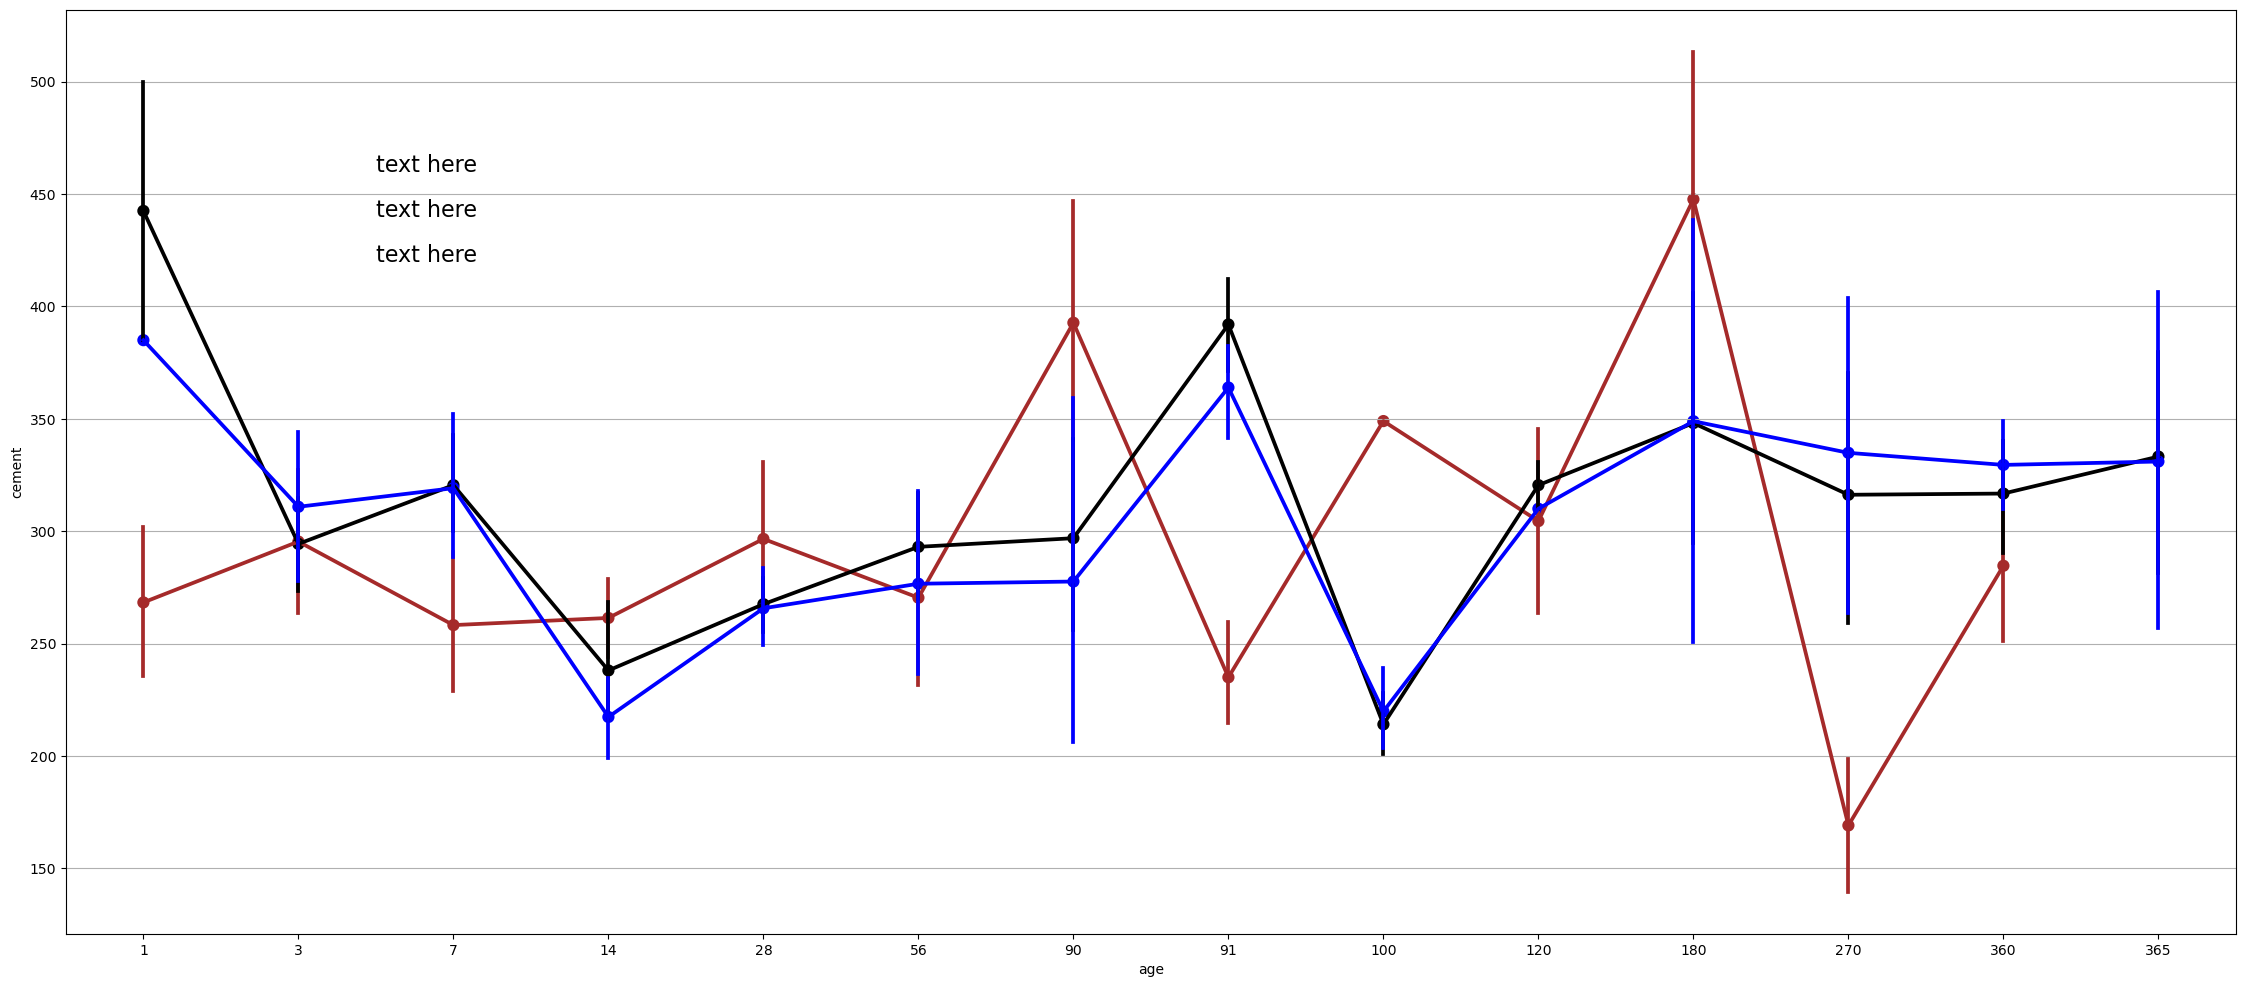

In [12]:
fig, ax1 = plt.subplots(figsize=(28, 12))
plt.grid()
sns.pointplot(data=concrete_data[:351], x='age', y='cement', color='brown', alpha=0.8, label='Data from 1-350')
sns.pointplot(data=concrete_data.iloc[351:, :701], x='age', y='cement', color='black', alpha=0.8)
sns.pointplot(data=concrete_data.iloc[701:], x='age', y='cement', color='blue', alpha=0.8)
plt.text(1.5, 460, 'text here', fontsize=16)
plt.text(1.5, 440, 'text here', fontsize=16)
plt.text(1.5, 420, 'text here', fontsize=16)

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
feature = concrete_data.drop('strength', axis=1)
target = concrete_data['strength']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Scaling features to prevent bias in the data and help ease gradient descent 

scale = StandardScaler()
scaled_feature = scale.fit_transform(feature)
scaled_feature[:10]

array([[-1.33901711,  1.60144087, -0.84714393,  1.02758961, -1.03914281,
        -0.01439767, -0.31296991, -0.27973311],
       [-1.07479007, -0.36754132,  1.09607803, -1.09011643,  0.76961738,
         1.38814131,  0.28226038, -0.50146528],
       [-0.29838379, -0.85688789,  0.64896501,  0.27327396, -0.11801494,
        -0.20612089,  1.09337085, -0.27973311],
       [-0.14520869,  0.46504362, -0.84714393,  2.17546125, -1.03914281,
        -0.52651741, -1.29254178, -0.27973311],
       [-1.20977562,  1.26979841, -0.84714393,  0.54970019,  0.48490513,
         0.95837249, -0.95936256, -0.27973311],
       [-0.25051657, -0.85688789, -0.84714393,  0.48879272, -1.03914281,
        -1.06951873,  2.13907941,  0.7022236 ],
       [-1.0948943 ,  2.04440389, -0.84714393,  1.02758961, -1.03914281,
         0.03449819, -1.01052491, -0.61233136],
       [-0.28498097, -0.85688789,  1.00227809,  0.32481106,  0.03271508,
         0.71389321, -0.19816658,  0.16373121],
       [ 0.14199462, -0.85688789

In [17]:
target = np.array(target).reshape(-1, 1)

In [18]:
# Plitting the data into train/test set

X_trian, X_test, y_train, y_test = train_test_split(scaled_feature, target, test_size=25, random_state=45)
print('Shapes for various data'.upper())
print('X-train shape:', X_trian.shape)
print('Y-train shape:', y_train.shape)
print('X-test shape:', X_test.shape)
print('Y-test shape:', y_test.shape)

SHAPES FOR VARIOUS DATA
X-train shape: (1005, 8)
Y-train shape: (1005, 1)
X-test shape: (25, 8)
Y-test shape: (25, 1)


In [19]:
X_trian[0]

array([ 0.64938713, -0.85688789, -0.84714393,  0.48879272, -1.03914281,
        0.95322555,  0.40455088,  4.97848673])

In [22]:
y_train[:10]

array([[42.13],
       [44.28],
       [60.2 ],
       [61.23],
       [22.49],
       [50.51],
       [71.3 ],
       [13.82],
       [25.08],
       [73.3 ]])

In [23]:
# import neccessary algorithms for the prediction

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
models = {'Linear Regression': LinearRegression,
         'Ridge': Ridge,
         'Random Forest': RandomForestRegressor,
         'Decison Tree': DecisionTreeRegressor,
         'SVR': SVR,
         'KNN Regressor': KNeighborsRegressor}

In [27]:
def fit_and_score(models, X_trian, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit-learn learning algorithms
    X_train: training data (m_examples, n_features)
    X_test: testing data (m_examples, )
    y_train: training data (m_examples, n_features)
    y_test: testing data (m_examples, )
    """
    
    # setting a random seed
    np.random.seed(45)
    
    # creating a dictionary to store model scores
    model_score = {}
    
    for name, model in models.items():
        # training the model to the data
        model.fit(X_trian, y_train)
        # ecaluating the model and appending the score to model_score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [26]:
scores = fit_and_score(models = models, X_trian = X_trian, X_test = X_test, y_train = y_train, y_test = y_test)
scores

TypeError: fit() missing 1 required positional argument: 'y'